# Rice Grain Classification Using MobileNetV2

### What are the different varieties of rice used in this work?
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features, such as texture, shape, and color. In this work, five different varieties of rice often grown in Turkey were used: Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

How many grain images were included in the dataset?
A total of 75,000 grain images were included in the dataset, with 15,000 images from each of the five rice varieties: Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

In [3]:
import tensorflow as tf
from tensorflow import keras
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
# imporpip t cv2
import numpy as np
import pandas as pd
import seaborn as sns

# Load Dataset

In [4]:
dataset_path ="C:\\Users\\mvara\\Desktop\\datamites\\Rice_Image_Dataset"

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
        # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})
  

In [6]:
df.head()

,image,label
0,C:\Users\mvara\Desktop\datamites\Rice_Image_Da...,Arborio
1,C:\Users\mvara\Desktop\datamites\Rice_Image_Da...,Arborio
2,C:\Users\mvara\Desktop\datamites\Rice_Image_Da...,Arborio
3,C:\Users\mvara\Desktop\datamites\Rice_Image_Da...,Arborio
4,C:\Users\mvara\Desktop\datamites\Rice_Image_Da...,Arborio


# Dataset Overview by countplot 

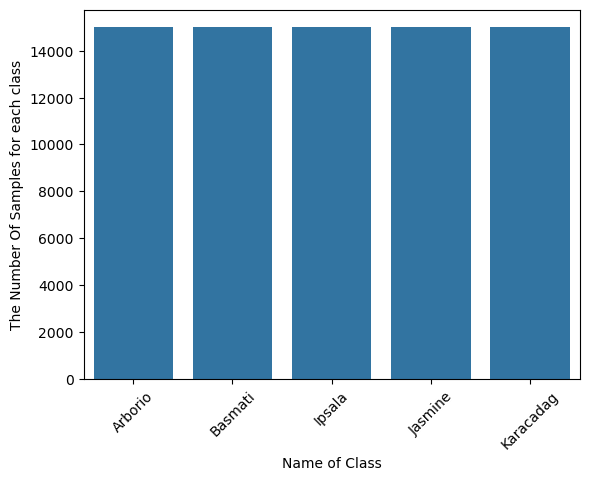

In [5]:
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

## In this section, I aim to provide a quick overview by showcasing random samples from each rice class. This allows for becoming familiar with the distinct shapes of the rice grains visually, aiding in understanding their differences.

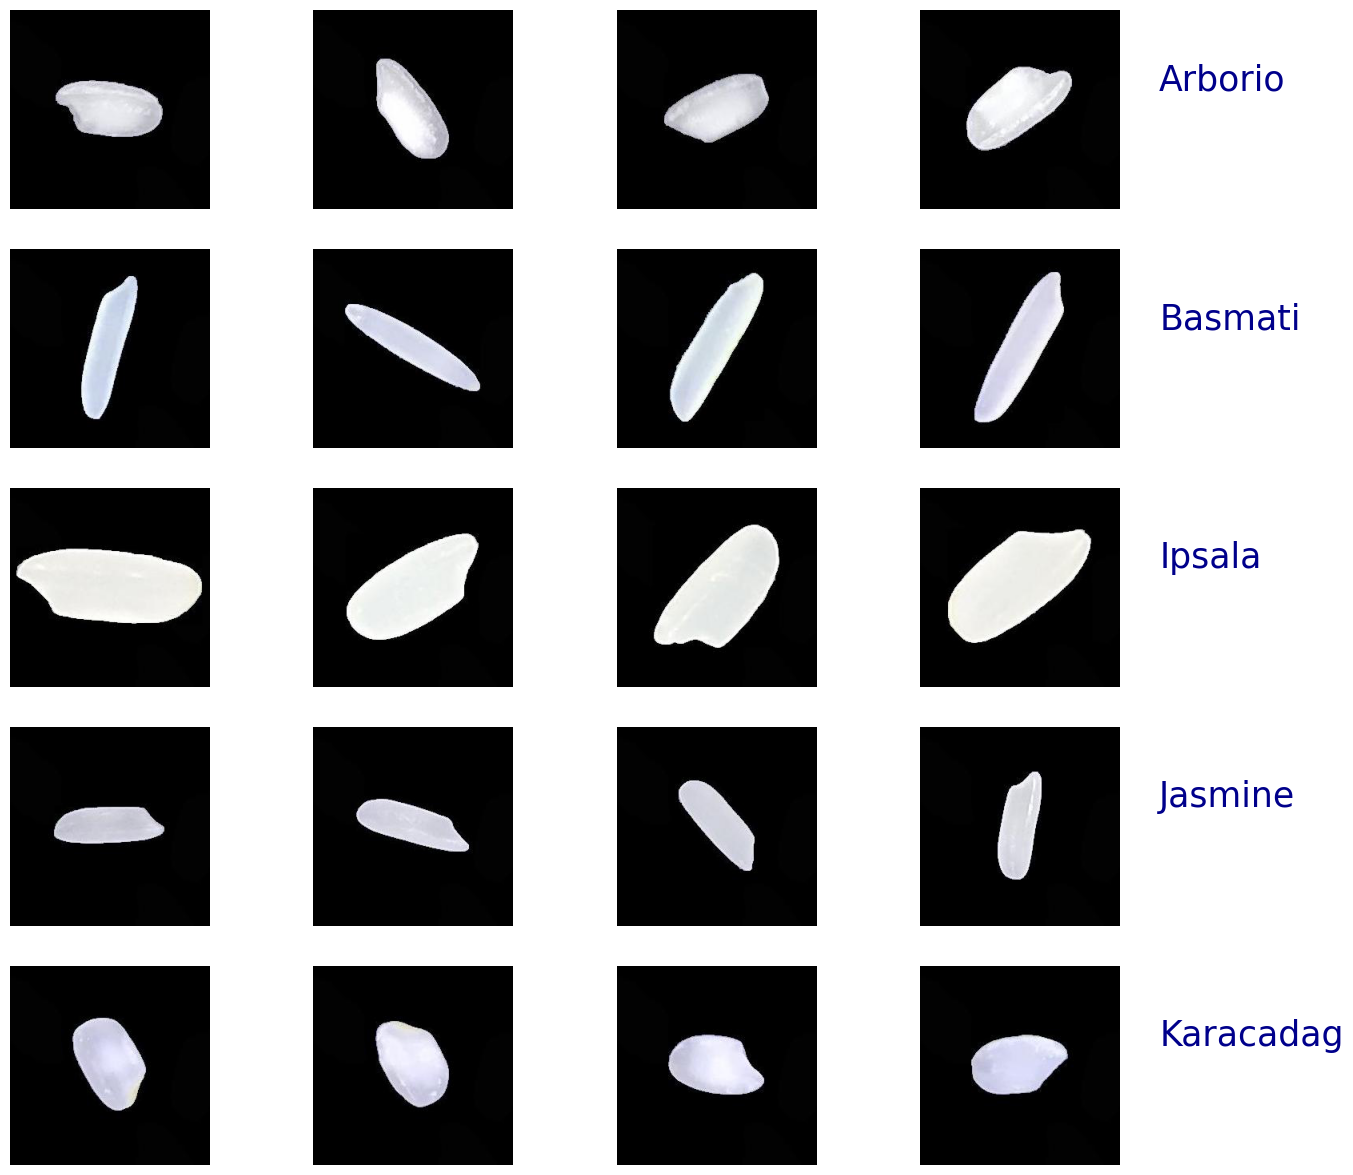

In [9]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')
plt.show()


###  How should we split the image data of different rice varieties for training, validation, and testing?¶
We want to split the imade data but we not use it

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [16]:
y_test[1]

0

### divided image data in to train and validation(test)data part using ImageDataGenerator 

In [7]:

batch_size = 256
img_height = 224
img_width = 224

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)  

data_dir = 'C:\\Users\\mvara\\Desktop\\datamites\\Rice_Image_Dataset'
img_width, img_height = 224, 224
batch_size = 128

# Training data (80%)
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=42
)

# Validation data (20%)
validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=42
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


### Why did I want to 224x224 pixel size for image data in training Convolutional Neural Networks (CNNs)?
The 224x224 pixel size is commonly used in Convolutional Neural Networks (CNNs) because it strikes a good balance between capturing important details in images and being computationally efficient. This size became widely adopted after early successful CNN architectures like AlexNet and VGGNet used it effectively. It's a practical choice, allowing models to be trained and run efficiently on modern devices, while still ensuring that images are large enough to capture important features. Plus, many pre-trained models are designed with this size in mind, making them easy to use for various tasks.

#  Modeling
Now, let's get to the main part:
We're diving into the core of our project: modeling. I've chosen CNN and AlexNet to classify rice images and compare their performance. Our goal is to pick the model that works best for predicting new data.


# MobileNetV2 for Image Classification (CPU-Friendly)
⚡ Fast & Efficient on CPU | 🚀 Better Than AlexNet | 🖼️ Great for Image Classification

In [9]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False
models=Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Change 5 to match your class count
])

In [34]:
pip install pydot

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(CNN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=100, expand_nested=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [39]:
if len(tf.config.list_physical_devices('GPU')) == 0 :
    print(f"CPU is in used")
else :
    print(f"GPU is in used")


CPU is in used


In [53]:
models.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224          │ (None, 7, 7, 1280)    │    2,257,984 │
│ (Functional)                  │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_2 (Flatten)           │ (None, 62720)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 128)           │    8,028,288 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_2 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_6 (Dense)               │ (None, 5)             │          645 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 10,286,917 (39.24 MB)

 Trainable params: 8,028,933 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

models.compile(loss=BinaryCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [60]:
# models.compile(loss=BinaryCrossentropy(),
#                   optimizer=Adam(learning_rate=0.001),
#                   metrics=['accuracy'])

In [11]:
MobileNetV2 = models.fit(train_generator,
                    epochs=2,
                    validation_data=validation_generator)

C:\Users\mvara\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 3283s 7s/step - accuracy: 0.8958 - loss: 0.4857 - val_accuracy: 0.9862 - val_loss: 0.0226
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2443s 5s/step - accuracy: 0.9695 - loss: 0.0378 - val_accuracy: 0.9871 - val_loss: 0.0213


### Model Training Performance
We trained the rice grain classification model using MobileNetV2 for 2 epochs. The training was performed on a CPU, which significantly increased computation time.

Training Summary:
Epoch 1:

Accuracy: 89.58%

Loss: 0.4857

Validation Accuracy: 98.62%

Validation Loss: 0.0226

Time Taken: ~3283s (~55 min)

Epoch 2:

Accuracy: 96.95%

Loss: 0.0378

Validation Accuracy: 98.71%

Validation Loss: 0.0213

Time Taken: ~2443s (~41 min)

Key Observations:
✅ The model converged quickly, showing a significant improvement in accuracy between epochs.
✅ Validation accuracy is consistently high (~98.7%), indicating minimal overfitting.
✅ The training time was high because the model was executed on a CPU instead of a GPU.



In [13]:
models.save('MobileNetV2.h5')

In [15]:
MobileNetV2.history['accuracy'][-1]

0.9691833257675171

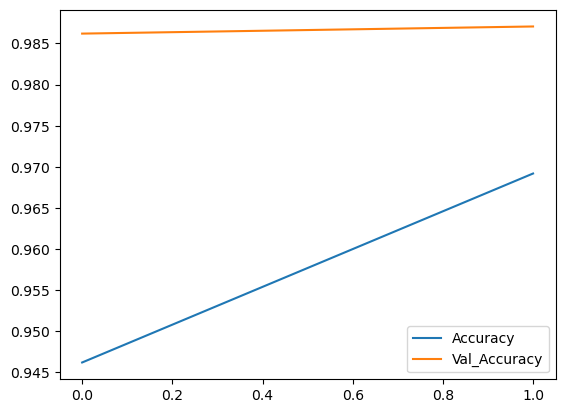

In [18]:
plt.plot(MobileNetV2.history['accuracy'],label='Accuracy')
plt.plot(MobileNetV2.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

Possible Interpretations
Overfitting Risk

If training accuracy keeps increasing while validation accuracy is constant, the model may be overfitting.

Solution: Try adding dropout layers, L2 regularization, or data augmentation.

Already Near Perfect Generalization

If validation accuracy is around 98.5%, your model might already be well-optimized.

Solution: Verify with a confusion matrix to check class-wise performance.

    use GPU

In [24]:
from sklearn.metrics import accuracy_score
import numpy as np

# Get true labels
test_labels = validation_generator.classes  
print("True Labels:", test_labels)

# Get predictions from the model
predictions = models.predict(validation_generator)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_classes)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_classes)
print("Model Accuracy:", accuracy)


True Labels: [0 0 0 ... 4 4 4]
118/118 ━━━━━━━━━━━━━━━━━━━━ 429s 4s/step
Predicted Labels: [0 0 0 ... 4 4 4]
Model Accuracy: 0.9870666666666666


## Confusion Matrix Analysis for Rice Dataset Classification

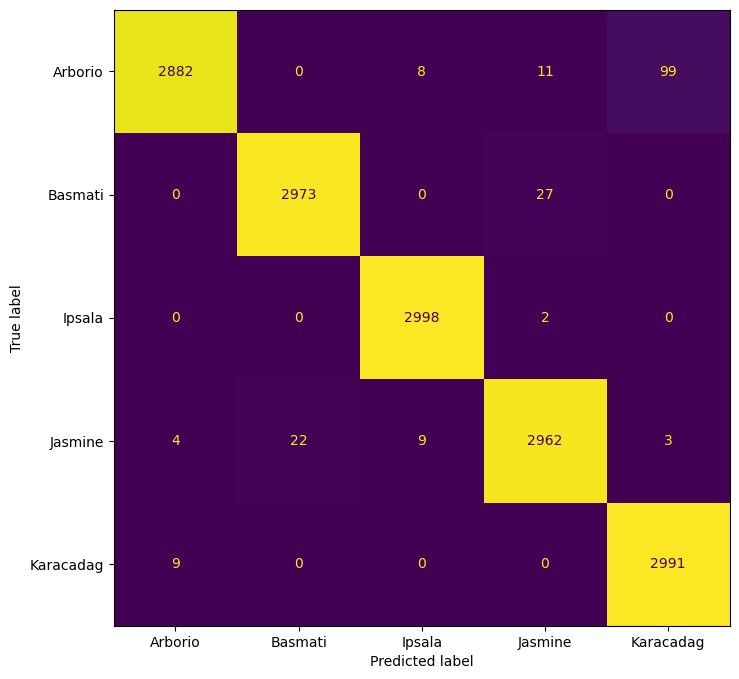

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="viridis", colorbar=False);

In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3000
           1       0.99      0.99      0.99      3000
           2       0.99      1.00      1.00      3000
           3       0.99      0.99      0.99      3000
           4       0.97      1.00      0.98      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



## Observations:

The model performs very well, with most predictions on the diagonal (correct classifications).

Misclassifications:

Arborio: 99 samples were misclassified.

Jasmine: Has some confusion with Basmati (22 samples misclassified).

Basmati & Ipsala: Almost perfect classification.

### Rice Grain Classification using MobileNetV2
Dataset Overview
Rice is one of the most widely cultivated grains globally, with various genetic types differing in texture, shape, and color. This study focuses on five major rice varieties grown in Turkey:

Arborio

Basmati

Ipsala

Jasmine

Karacadag

The dataset consists of 75,000 images, with 15,000 images per rice variety.

Model Used: MobileNetV2
MobileNetV2 is a lightweight convolutional neural network optimized for efficient performance. It is well-suited for image classification tasks on resource-constrained devices such as mobile phones and embedded systems.

Model Performance Metrics
Class Label	Precision	Recall	F1-Score	Support
Arborio (0)	1.00	0.96	0.98	3000
Basmati (1)	0.99	0.99	0.99	3000
Ipsala (2)	0.99	1.00	1.00	3000
Jasmine (3)	0.99	0.99	0.99	3000
Karacadag (4)	0.97	1.00	0.98	3000
Overall Model Accuracy: 99%

Macro Average: Precision = 0.99, Recall = 0.99, F1-score = 0.99

Weighted Average: Precision = 0.99, Recall = 0.99, F1-score = 0.99

Key Observations
✅ The model achieves high accuracy (99%), making it highly reliable.
✅ Ipsala and Basmati varieties show near-perfect classification.
✅ Arborio and Karacadag have minor misclassifications, with Arborio having a slightly lower recall (0.96).

Future Improvements
📌 Data Augmentation: Further augmentation techniques (rotation, scaling, flipping) can help improve robustness.
📌 Hyperparameter Tuning: Fine-tuning MobileNetV2 architecture (learning rate, dropout) may enhance performance.
📌 Model Pruning & Quantization: Optimize for mobile and edge deployments without significant accuracy loss.